<a href="https://colab.research.google.com/github/Aidan4478D/ECE414/blob/main/Updated%20ECE414_Assignment_1.ipynb%20for%20Part%201" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: The Santa Fe "Digital Twin" Feasibility Study
## ECE414 - Fundamentals of Remote Sensing and Earth Observation
- Contact: Teams chat
- Submit to: krishna.karra@gmail.com
- *Assigned: Wednesday, February 4 2026*
- *Due: Friday, February 20 2026 (midnight EST)*

## Motivation & Background
Flag_of_New_Mexico.svg

You are a newly hired geospatial data science consultant for the Land of Enchantment, the great state of New Mexico. The governor's office is funding a new digital initiative, focused on developing and proving out geospatial capabilities with satellite imagery. The ultimate goal is to monitor land use changes, enforce water rights, analyze climatic conditions over time and more.

A geospatial consultant was hired in late 2019 to analyze satellite imagery over Santa Fe. After COVID hit and all work went remote, it was slowly discovered that the consultant hadn't made any tangible progress with the data and was delinquent in delivering the necessary reports. This consultant was fired in late 2020, and the work was never picked up again. In 2026, funding has resumed for this initiative, and you have been hired to pick up the task.

The client left behind a stack of raw data and a promise to the government that the data was ready for "immediate analysis". A GIS analyst in the government attempted to run a simple analysis and failed. Your goal as a geospatial data scientist is to make sense of this data and ultimately deliver a report to the governor's office on the utility of this data for the state.

The specifics of what needs to be included in your analysis and report is outlined below. There are two "customers" of your deliverable: (1) the "technical client" e.g. the GIS analyst who has some familiarity with data and interpreting results, and (2) the "business client" e.g. a lawmaker who is only interested in the final products of what you produce.

## Problem Overview
In this problem, you will be analyzing and processing imagery from ESA's Sentinel-2 satellite captured over the greater Santa Fe metro area from 2019 to 2020.

There is a .zip file that contains the contents of this dataset in GeoTIFF format. Each GeoTIFF file contains seven spectral bands, in the following order: (1) red, (2) green, (3) blue, (4) nir, (5) swir1, (6) swir2, and (7) alpha. Note the alpha band represents valid areas in each scene.

## Part 1
The first thing the technical client tried to do was load all the images into a Python datacube to look at the average color of Santa Fe.

*"I tried to stack these images into a numpy array but the code errored out complaining about shape mismatches. I tried visualizing some of the data but it looked all black. Can you help us correct and standardize this data so it's easier to analyze?*

For the technical client, you need to provide a new dataset (all the files can be placed in a .zip file) that they can plug into their existing verification code. For the business client, they need visual and written evidence of the processing steps you took, and what this imagery even looks like, to help them justify keeping you on payroll.

## Part 2
The technical client successfully averaged your corrected stack, but they were unhappy with the results.

*"The average map looks super ghosty, washed out and not at all like what I expected. I animated all the frames and noticed weird black bars flickering in and out of some images. There's clearly some bad data in here, we need a way to only analyze the valid land data.*

You need to devise an approach to figure out which pixels are suitable for analysis in this stack of imagery. The technical client needs to have a way to, for every scene, have a "validity mask" along with the satellite image to figure out which pixels are useful. The business client needs to have this well-documented as part of the report to understand the nuances and limitations of satellite imagery in general.

The technical client had a note with regards to clouds in the imagery:

*"I tried applying a threshold in the nir infrared band to detect clouds which seemed to sort of work, but it had a lot of false positives and missed clouds.*

Neither the technical client or business client are expecting perfection, but they are expecting meaningful progress and a well-documented, automated approach.

## Part 3
As part of the funding of this initiative, the government wants to measure how well satellite imagery can track major environmental and weather-related events using satellite data. To this end, they want you to use satellite imagery to determine, for 2019:

1. When the most snowfall happened
2. When the city had the highest fuel load (wildfire risk)
3. When the city was the driest

The business client expects a date for each one of these, along with a time window that can be inferred from the date. The technical client needs to be able to reproduce your analysis in order to answer follow-up questions using the methods you develop.

Note that the technical client is interested in answering these questions with remote sensing indices that measure standard proxies of vegetation and water. The business client is interested in understanding the limitations that standard remote sensing poses when trying to answer these complex questions.

## Part 4
The government plans to use this digital initiative to foster tourism to Santa Fe and inspire awe about the high desert landscape.

To this end, the business client wants three specific maps to plaster on the walls inside city hall:

1. The Toursim Map - *"We need a picture of Santa Fe that looks like a sunny summer day, with zero clouds and no snow. It needs to look natural but beautiful."*
2. The Fire Risk Map - *"We need a map that assumes the worst case scenario for biomass. It needs to show the absolute greenest point in every place across the year."*
3. The Ski Map - *"Show us the maximum extent of the snowpack for the entire year on one image."*

The business client expects ready-to-print maps for each of these scenarios. Once again, the technical client needs to be able to recreate these maps and possibly make more versions of them in the future.

# Helpful Tips

1. Environment Setup
- **Notebook Ownership:** Create a copy of the original Colaboratory notebook and save it to your personal or university Google Drive.
- **Compute Resources:** As the dataset and processing tasks can be memory-intensive, ensure you are utilizing Colab Pro or a local machine with sufficient processing power to avoid session crashes.

2. Structure & Organization
- **Logical Flow:** Organize the notebook strictly according to the four parts outlined in the assignment.
- **Modular Code:** Use functions for repetitive tasks, such as plotting or index calculation, rather than copy pasting the same code over and over again
- **Intermediate Checkpoints:** It is highly recommended to save the output of Part 1 (the cleaned/masked data) as intermediate files to manage RAM usage more efficiently.

3. Documentation & Analysis
- **Not just "How", but "Why"**: Include Markdown cells explaining your technical choices—for example, why you chose a specific threshold for cloud masking or how you handled coordinate system mismatches.
- **Insightful Commentary:** Discuss any anomalies you find in the Santa Fe dataset, such as the "black bars" or "ghosty" artifacts mentioned by the technical client.

4. Final Delivery
- **Sharing Settings:** Share the notebook with the instructor (krishna.karra@gmail.com) and ensure the permissions are set to "Commenter" so feedback can be provided directly on your work.
- Deadline: Ensure all files and the notebook link are submitted before Friday, February 20, 2026, at midnight EST.

# Data access
The code below should get you started with downloading the dataset to your colab environment and installing the necessary Python packages. You are expected to use other libraries and GIS software as necessary to complete the assignment.

The dataset can also be downloaded locally to your machine from this [link](https://drive.google.com/file/d/17vcid-djDTh0lrTF6VJy_oMcwSc7md1z/view?usp=sharing).

In [33]:
!wget https://storage.googleapis.com/krishna-skytruth-dev/ece471/homework_1/s2_santafe.zip
!unzip -oq s2_santafe.zip

--2026-02-06 22:07:19--  https://storage.googleapis.com/krishna-skytruth-dev/ece471/homework_1/s2_santafe.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.207, 108.177.119.207, 108.177.127.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3327331282 (3.1G) [application/zip]
Saving to: ‘s2_santafe.zip.1’

s2_santafe.zip.1    100%[===================>]   3.10G  40.9MB/s    in 77s     

2026-02-06 22:08:36 (41.3 MB/s) - ‘s2_santafe.zip.1’ saved [3327331282/3327331282]



In [34]:
!ls s2_santafe/

sentinel-2:L1C_2018-01-07.tif  sentinel-2:L1C_2018-07-18.tif
sentinel-2:L1C_2018-01-12.tif  sentinel-2:L1C_2018-07-21.tif
sentinel-2:L1C_2018-01-14.tif  sentinel-2:L1C_2018-07-23.tif
sentinel-2:L1C_2018-01-27.tif  sentinel-2:L1C_2018-07-26.tif
sentinel-2:L1C_2018-01-29.tif  sentinel-2:L1C_2018-07-28.tif
sentinel-2:L1C_2018-02-08.tif  sentinel-2:L1C_2018-07-31.tif
sentinel-2:L1C_2018-02-11.tif  sentinel-2:L1C_2018-08-02.tif
sentinel-2:L1C_2018-02-13.tif  sentinel-2:L1C_2018-08-05.tif
sentinel-2:L1C_2018-02-18.tif  sentinel-2:L1C_2018-08-07.tif
sentinel-2:L1C_2018-02-21.tif  sentinel-2:L1C_2018-08-10.tif
sentinel-2:L1C_2018-02-23.tif  sentinel-2:L1C_2018-08-12.tif
sentinel-2:L1C_2018-02-28.tif  sentinel-2:L1C_2018-08-17.tif
sentinel-2:L1C_2018-03-03.tif  sentinel-2:L1C_2018-08-20.tif
sentinel-2:L1C_2018-03-10.tif  sentinel-2:L1C_2018-08-25.tif
sentinel-2:L1C_2018-03-13.tif  sentinel-2:L1C_2018-08-27.tif
sentinel-2:L1C_2018-03-15.tif  sentinel-2:L1C_2018-09-04.tif
sentinel-2:L1C_2018-03-2

In [35]:
!ls s2_santafe/ | wc -l

102


In [36]:
!pip install rasterio

# Part 1

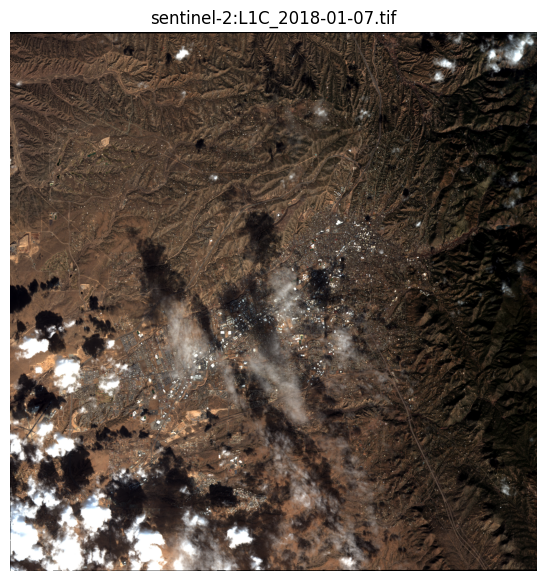

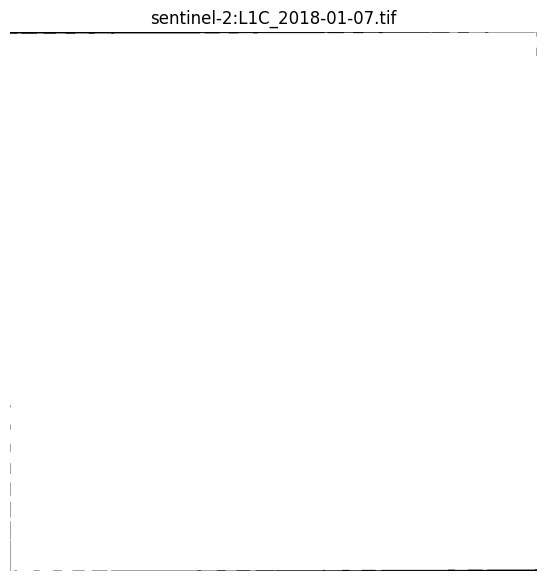

In [40]:
from affine import loadsw
from osgeo import gdal
import rasterio

import numpy as np
import matplotlib.pyplot as plt

import rasterio.features
import rasterio.warp

# exampkle tif file in dataset
tif = "/content/s2_santafe/sentinel-2:L1C_2018-01-07.tif"


# contrast stretching
def stretch(band, mask, margin=2, epsilon=1e-6):
    vals = band[mask]

    # used percentiles over min/max as the latter are often dominated by outliers
    low_2 = np.percentile(vals, margin)
    high_2 = np.percentile(vals, 100-margin)

    # clip normalized values between 0 and 1, add epsilon to avoid div by 0 when low_2 = high_2
    return np.clip((band - low_2) / (high_2 - low_2 + epsilon), 0, 1)

def show_fixed_rgb(path, contrast_stretch=False):
    with rasterio.open(path) as src:
        img = src.read()

        # extract R, G, B & alpha
        R, G, B = img[0].astype(np.float32), img[1].astype(np.float32), img[2].astype(np.float32)
        alpha = img[6] > 0 # valid data mask as bool vector

    if contrast_stretch:
        rgb = np.dstack([
            stretch(R, alpha),
            stretch(G, alpha),
            stretch(B, alpha),
        ])
    else:
        rgb = np.dstack([
            R,
            G,
            B,
        ])

    plt.figure(figsize=(7,7))
    plt.imshow(rgb)
    plt.axis("off")
    plt.title(path.split("/")[-1])
    plt.show()

show_fixed_rgb(tif, contrast_stretch=True)
show_fixed_rgb(tif)


In [41]:
import os
from glob import glob
import numpy as np
import rasterio

INPUT_DIR = "/content/s2_santafe"
OUTPUT_DIR = "/content/s2_santafe_fixed"

os.makedirs(OUTPUT_DIR, exist_ok=True)

tif_files = sorted(glob(os.path.join(INPUT_DIR, "*.tif")))
print(f"Found {len(tif_files)} GeoTIFF files")

for tif in tif_files:
    fname = os.path.basename(tif)

    with rasterio.open(INPUT_DIR + '/' + fname) as src:
        data = src.read().astype(np.float32)  # (7, H, W)
        meta = src.meta.copy()

    # scale reflectance bands from 0 to 1
    data[:6] = np.clip(data[:6] / 10000.0, 0, 1)

    # alpha band as a boolean mask
    data[6] = (data[6] > 0).astype(np.float32)

    # update the metadata within the .tif file
    meta.update(
        dtype="float32",
        nodata=0.0,
        compress="deflate",
        predictor=3
    )

    out_tif = os.path.join(OUTPUT_DIR, fname.replace(".tif", "_fixed.tif"))
    with rasterio.open(out_tif, "w", **meta) as dst:
        dst.write(data)

    print("fixed:", fname)

Found 102 GeoTIFF files
fixed: sentinel-2:L1C_2018-01-07.tif
fixed: sentinel-2:L1C_2018-01-12.tif
fixed: sentinel-2:L1C_2018-01-14.tif
fixed: sentinel-2:L1C_2018-01-27.tif
fixed: sentinel-2:L1C_2018-01-29.tif
fixed: sentinel-2:L1C_2018-02-08.tif
fixed: sentinel-2:L1C_2018-02-11.tif
fixed: sentinel-2:L1C_2018-02-13.tif
fixed: sentinel-2:L1C_2018-02-18.tif
fixed: sentinel-2:L1C_2018-02-21.tif
fixed: sentinel-2:L1C_2018-02-23.tif
fixed: sentinel-2:L1C_2018-02-28.tif
fixed: sentinel-2:L1C_2018-03-03.tif
fixed: sentinel-2:L1C_2018-03-10.tif
fixed: sentinel-2:L1C_2018-03-13.tif
fixed: sentinel-2:L1C_2018-03-15.tif
fixed: sentinel-2:L1C_2018-03-25.tif
fixed: sentinel-2:L1C_2018-03-28.tif
fixed: sentinel-2:L1C_2018-03-30.tif
fixed: sentinel-2:L1C_2018-04-02.tif
fixed: sentinel-2:L1C_2018-04-04.tif
fixed: sentinel-2:L1C_2018-04-07.tif
fixed: sentinel-2:L1C_2018-04-09.tif
fixed: sentinel-2:L1C_2018-04-14.tif
fixed: sentinel-2:L1C_2018-04-19.tif
fixed: sentinel-2:L1C_2018-04-22.tif
fixed: sentine

In [47]:
from google.colab import drive
import shutil

# drive.mount('/content/drive')

TARGET_DIR = "/content/drive/MyDrive/datasets/ece414_remote_sensing/"
os.makedirs(TARGET_DIR, exist_ok=True)

SRC_DIR = "/content/s2_santafe_fixed"
DST_DIR = TARGET_DIR + "s2_santafe_fixed"

shutil.copytree(SRC_DIR, TARGET_DIR, dirs_exist_ok=True)

'/content/drive/MyDrive/datasets/ece414_remote_sensing/'

In [50]:
import matplotlib.pyplot as plt

DATA_DIR = "/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed"

show = 102
test = sorted(glob(os.path.join(DATA_DIR, "*_fixed.tif")))[:10]

for t in test:
    show_fixed_rgb(test)

TypeError: invalid path or file: ['/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-01-07_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-01-12_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-01-14_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-01-27_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-01-29_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-02-08_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-02-11_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-02-13_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-02-18_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-02-21_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-02-23_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-02-28_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-03-03_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-03-10_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-03-13_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-03-15_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-03-25_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-03-28_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-03-30_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-04-02_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-04-04_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-04-07_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-04-09_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-04-14_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-04-19_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-04-22_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-04-24_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-04-29_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-05-04_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-05-14_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-05-19_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-05-22_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-05-24_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-05-29_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-06-01_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-06-03_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-06-08_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-06-11_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-06-13_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-06-18_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-06-21_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-06-23_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-06-26_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-06-28_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-07-01_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-07-03_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-07-06_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-07-08_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-07-11_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-07-13_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-07-16_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-07-18_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-07-21_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-07-23_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-07-26_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-07-28_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-07-31_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-08-02_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-08-05_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-08-07_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-08-10_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-08-12_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-08-17_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-08-20_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-08-25_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-08-27_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-09-04_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-09-09_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-09-11_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-09-14_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-09-16_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-09-19_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-09-21_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-09-24_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-09-26_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-09-29_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-10-04_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-10-06_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-10-11_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-10-16_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-10-19_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-10-21_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-10-26_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-10-29_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-11-03_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-11-05_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-11-08_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-11-10_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-11-13_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-11-15_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-11-18_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-11-23_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-11-25_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-11-28_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-12-03_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-12-05_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-12-08_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-12-13_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-12-15_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-12-18_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-12-20_fixed.tif', '/content/drive/MyDrive/datasets/ece414_remote_sensing/s2_santafe_fixed/sentinel-2:L1C_2018-12-30_fixed.tif']